In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def logistic(x):
    return np.exp(x) / (1 + np.exp(x))

x = np.linspace(-6,6,50, dtype=float)
y = logistic(x)

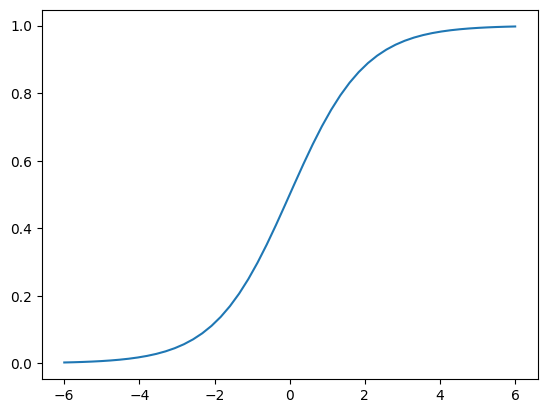

In [3]:
plt.plot(x,y)

In [12]:
data = pd.read_csv('Day5.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [13]:
data.shape

(400, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [15]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

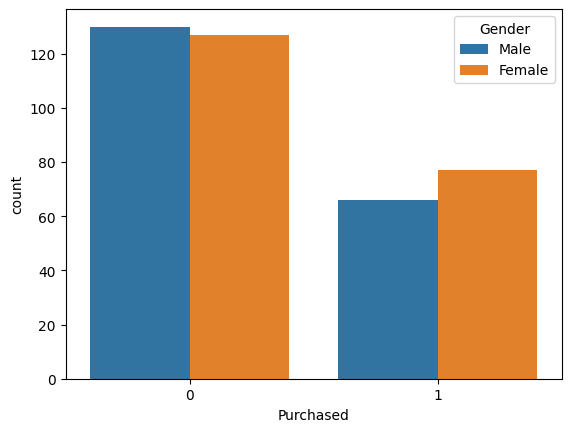

In [18]:
#EDA
sns.countplot(x=data['Purchased'],hue=data['Gender'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10840\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

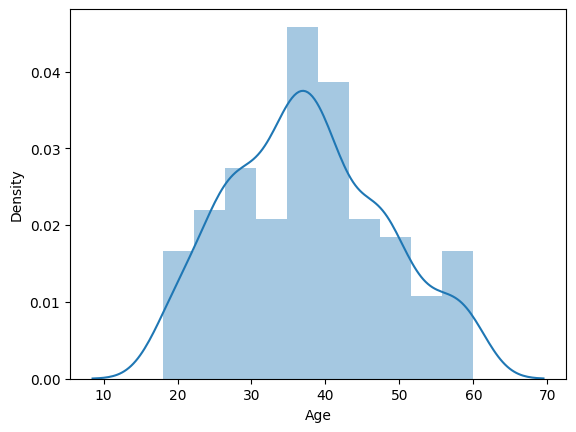

In [19]:
sns.distplot(data['Age'])

In [20]:
X = data[['Age','EstimatedSalary']]

In [21]:
y = data['Purchased']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
#X_train

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
#Model Building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
#Prediction
y_pred = model.predict(X_test)

In [28]:
#Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
cm

array([[75,  4],
       [ 9, 32]], dtype=int64)

In [29]:
acc = accuracy_score(y_test,y_pred)
acc

0.8916666666666667

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        79
           1       0.89      0.78      0.83        41

    accuracy                           0.89       120
   macro avg       0.89      0.86      0.88       120
weighted avg       0.89      0.89      0.89       120



# Logistic Regression Application

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('Adultall1.csv')
data

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [34]:
data.shape

(32561, 15)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE            32561 non-null  int64 
 1   WORKCLASS      32561 non-null  object
 2   FNLWGT         32561 non-null  int64 
 3   EDUCATION      32561 non-null  object
 4   EDUCATIONNUM   32561 non-null  int64 
 5   MARITALSTATUS  32561 non-null  object
 6   OCCUPATION     32561 non-null  object
 7   RELATIONSHIP   32561 non-null  object
 8   RACE           32561 non-null  object
 9   SEX            32561 non-null  object
 10  CAPITALGAIN    32561 non-null  int64 
 11  CAPITALLOSS    32561 non-null  int64 
 12  HOURSPERWEEK   32561 non-null  int64 
 13  NATIVECOUNTRY  32561 non-null  object
 14  ABOVE50K       32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


[Text(0, 0, ' Bachelors'),
 Text(1, 0, ' HS-grad'),
 Text(2, 0, ' 11th'),
 Text(3, 0, ' Masters'),
 Text(4, 0, ' 9th'),
 Text(5, 0, ' Some-college'),
 Text(6, 0, ' Assoc-acdm'),
 Text(7, 0, ' Assoc-voc'),
 Text(8, 0, ' 7th-8th'),
 Text(9, 0, ' Doctorate'),
 Text(10, 0, ' Prof-school'),
 Text(11, 0, ' 5th-6th'),
 Text(12, 0, ' 10th'),
 Text(13, 0, ' 1st-4th'),
 Text(14, 0, ' Preschool'),
 Text(15, 0, ' 12th')]

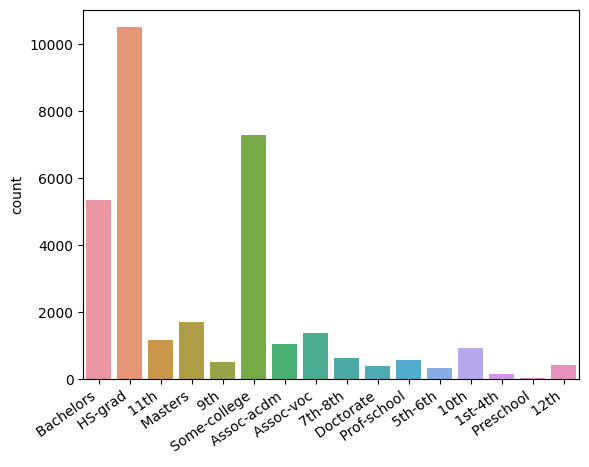

In [38]:
ax = sns.countplot(x=data.EDUCATION.values, data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35, ha="right")

[Text(0, 0, ' Never-married'),
 Text(1, 0, ' Married-civ-spouse'),
 Text(2, 0, ' Divorced'),
 Text(3, 0, ' Married-spouse-absent'),
 Text(4, 0, ' Separated'),
 Text(5, 0, ' Married-AF-spouse'),
 Text(6, 0, ' Widowed')]

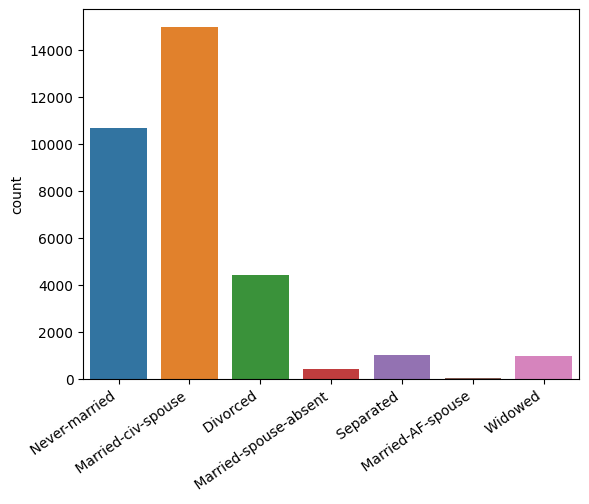

In [41]:
ax = sns.countplot(x=data.MARITALSTATUS.values, data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35, ha="right")

[Text(0, 0, ' Adm-clerical'),
 Text(1, 0, ' Exec-managerial'),
 Text(2, 0, ' Handlers-cleaners'),
 Text(3, 0, ' Prof-specialty'),
 Text(4, 0, ' Other-service'),
 Text(5, 0, ' Sales'),
 Text(6, 0, ' Craft-repair'),
 Text(7, 0, ' Transport-moving'),
 Text(8, 0, ' Farming-fishing'),
 Text(9, 0, ' Machine-op-inspct'),
 Text(10, 0, ' Tech-support'),
 Text(11, 0, ' ?'),
 Text(12, 0, ' Protective-serv'),
 Text(13, 0, ' Armed-Forces'),
 Text(14, 0, ' Priv-house-serv')]

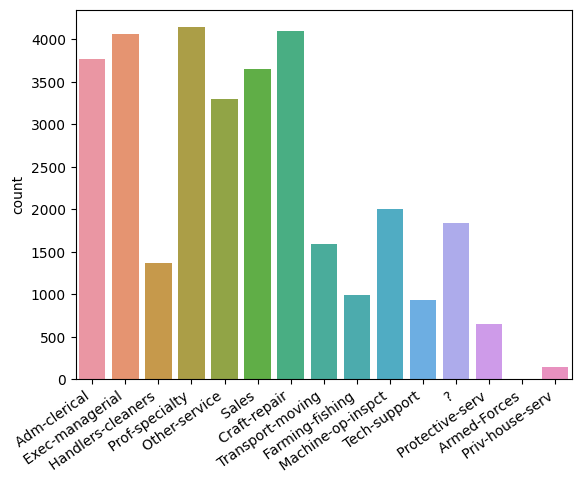

In [42]:
ax = sns.countplot(x=data.OCCUPATION.values, data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35, ha="right")

<Axes: >

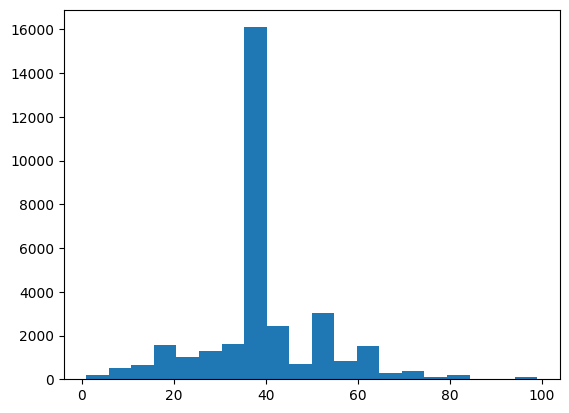

In [44]:
data["HOURSPERWEEK"].hist(grid=False,bins=20)

In [45]:
#Preprocessing
data.isnull().sum()

AGE              0
WORKCLASS        0
FNLWGT           0
EDUCATION        0
EDUCATIONNUM     0
MARITALSTATUS    0
OCCUPATION       0
RELATIONSHIP     0
RACE             0
SEX              0
CAPITALGAIN      0
CAPITALLOSS      0
HOURSPERWEEK     0
NATIVECOUNTRY    0
ABOVE50K         0
dtype: int64

In [46]:
data.dropna(how='all')

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [49]:
data.drop([ 'FNLWGT','EDUCATION','MARITALSTATUS','RELATIONSHIP','CAPITALGAIN','CAPITALLOSS' ],axis=1, inplace=True)

In [50]:
data

,AGE,WORKCLASS,EDUCATIONNUM,OCCUPATION,RACE,SEX,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,13,Adm-clerical,White,Male,40,United-States,0
1,50,Self-emp-not-inc,13,Exec-managerial,White,Male,13,United-States,0
2,38,Private,9,Handlers-cleaners,White,Male,40,United-States,0
3,53,Private,7,Handlers-cleaners,Black,Male,40,United-States,0
4,28,Private,13,Prof-specialty,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Tech-support,White,Female,38,United-States,0
32557,40,Private,9,Machine-op-inspct,White,Male,40,United-States,1
32558,58,Private,9,Adm-clerical,White,Female,40,United-States,0
32559,22,Private,9,Adm-clerical,White,Male,20,United-States,0


In [51]:
data.shape

(32561, 9)

In [52]:
data.drop(['NATIVECOUNTRY'], axis=1,inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AGE           32561 non-null  int64 
 1   WORKCLASS     32561 non-null  object
 2   EDUCATIONNUM  32561 non-null  int64 
 3   OCCUPATION    32561 non-null  object
 4   RACE          32561 non-null  object
 5   SEX           32561 non-null  object
 6   HOURSPERWEEK  32561 non-null  int64 
 7   ABOVE50K      32561 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [55]:
X=data.iloc[:,6].values
y=data.iloc[:,7].values

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
X_train

array([40, 54, 50, ..., 40, 45, 48], dtype=int64)

In [58]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      4918
           1       0.35      0.04      0.07      1595

    accuracy                           0.75      6513
   macro avg       0.55      0.51      0.46      6513
weighted avg       0.66      0.75      0.66      6513



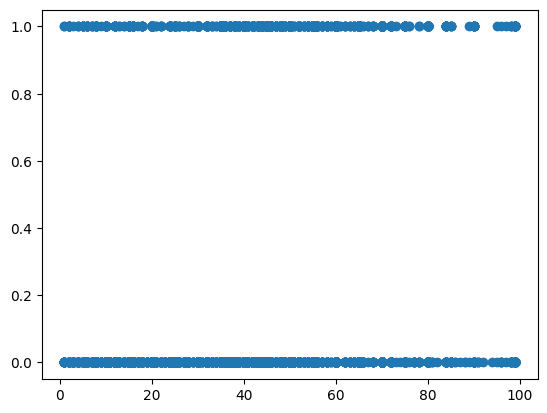

In [62]:
plt.scatter(data['HOURSPERWEEK'], data['ABOVE50K'])

<Axes: xlabel='HOURSPERWEEK', ylabel='ABOVE50K'>

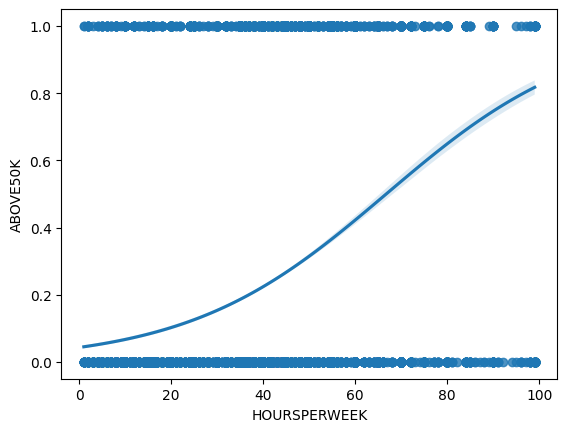

In [63]:
import seaborn as sns
sns.regplot(x='HOURSPERWEEK', y='ABOVE50K',data=data,logistic=True)

<Axes: >

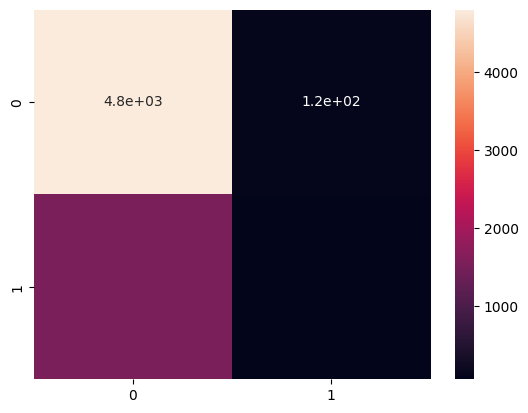

In [64]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)

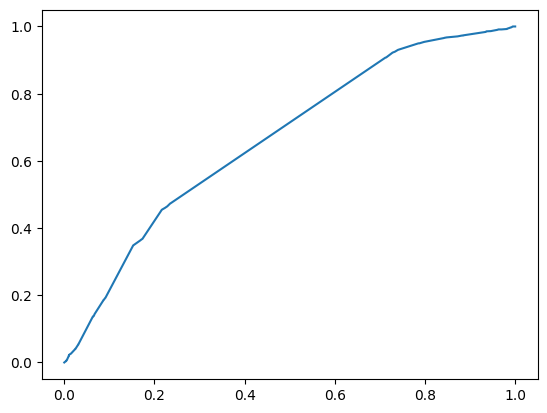

In [67]:
from sklearn import metrics
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)